In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
r_sales = pd.read_csv('retail_sale.csv')
r_sales.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [42]:
r_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              30000 non-null  int64  
 1   MONTH             30000 non-null  int64  
 2   SUPPLIER          29967 non-null  object 
 3   ITEM CODE         30000 non-null  object 
 4   ITEM DESCRIPTION  30000 non-null  object 
 5   ITEM TYPE         30000 non-null  object 
 6   RETAIL SALES      29999 non-null  float64
 7   RETAIL TRANSFERS  30000 non-null  float64
 8   WAREHOUSE SALES   30000 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.1+ MB


In [4]:
r_sales.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,30000.0,30000.000000,29999.000000,30000.000000,30000.000000
mean,2020.0,3.911467,6.939796,6.594058,27.431031
std,0.0,2.836788,33.081054,27.879428,272.166085
min,2020.0,1.000000,-0.420000,-6.000000,-3999.000000
25%,2020.0,1.000000,0.000000,0.000000,0.000000
50%,2020.0,3.000000,0.160000,0.000000,1.000000
75%,2020.0,7.000000,2.920000,3.000000,6.000000
max,2020.0,9.000000,2739.000000,1507.000000,18317.000000


In [44]:
r_sales.shape

(30000, 9)

In [45]:
r_sales.columns

Index(['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION',
       'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'],
      dtype='object')

In [46]:
r_sales.value_counts('ITEM TYPE')

ITEM TYPE
WINE            18680
LIQUOR           5995
BEER             4217
KEGS              808
NON-ALCOHOL       216
STR_SUPPLIES       63
DUNNAGE            13
REF                 8
Name: count, dtype: int64

In [47]:
r_sales.value_counts('SUPPLIER')

SUPPLIER
THE COUNTRY VINTNER, LLC DBA WINEBOW     2041
REPUBLIC NATIONAL DISTRIBUTING CO        1832
SOUTHERN GLAZERS WINE AND SPIRITS        1304
LEGENDS LTD                              1227
MONSIEUR TOUTON SELECTION                1131
                                         ... 
MARQUEE SELECTIONS LLC                      1
THE SANDY BOTTOM ENTERPRISES LLC            1
BREWDOG BREWING COMPANY LLC                 1
VINIFERA DISTRIBUTING OF MARYLAND INC       1
Z WINE GALLERY IMPORTS LLC                  1
Name: count, Length: 290, dtype: int64

In [48]:
r_sales.isnull().sum()

YEAR                 0
MONTH                0
SUPPLIER            33
ITEM CODE            0
ITEM DESCRIPTION     0
ITEM TYPE            0
RETAIL SALES         1
RETAIL TRANSFERS     0
WAREHOUSE SALES      0
dtype: int64

In [49]:
sales_by_items = r_sales.groupby('ITEM DESCRIPTION')['RETAIL SALES'].sum().reset_index(name='sum_sales').sort_values('sum_sales',ascending=False)
sales_by_items[sales_by_items['sum_sales'] <= 0]

,ITEM DESCRIPTION,sum_sales
15711,ZONTA MERLOT BERGANZE - 750ML,0.00
55,1861 MALB - 750ML,0.00
5122,DOM DES COLTABARDS WHITE SANCERRE - 750ML,0.00
40,18 BIELER PERE & FILS SABINE ROSE - 750ML,0.00
34,1623 RASPBERRY BLONDE 4/6 CANS,0.00
...,...,...
15706,ZOLO MENDOZA MAL - 750ML,0.00
10816,OC DISTILLING CO - ORANGE VODKA - 750ML,-0.01
13811,STORE SPECIAL WINE 750 ML - 750ML,-0.08
3469,CH MUSAR JEUNE RGE - 750ML,-0.17


In [8]:
r_sales['TOTAL SALES'] = r_sales['RETAIL SALES'] + r_sales['WAREHOUSE SALES']

In [9]:
r_sales

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0,2.00
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0,4.00
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0,1.00
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0,1.00
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0,0.82
...,...,...,...,...,...,...,...,...,...,...
29995,2020,3,"THE COUNTRY VINTNER, LLC DBA WINEBOW",352322,FORTALEZA ANEJO TEQUILA - 750ML,LIQUOR,0.33,0.0,0.0,0.33
29996,2020,3,OSLO ENTERPRISE,352324,DOMAINE BRICHOT BLANC - 750ML,WINE,0.00,0.0,0.0,0.00
29997,2020,3,OPICI FAMILY DISTRIBUTING OF MD,352354,LOTE 44 MALBEC - 750ML,WINE,0.00,0.0,6.0,6.00
29998,2020,3,CAMPARI AMERICA LLC,35238,SKYY VODKA - 1.75L,LIQUOR,329.04,302.0,0.0,329.04


In [10]:
r_sales.groupby('ITEM TYPE')['TOTAL SALES'].sum().sort_values(ascending=False)

ITEM TYPE
BEER            756818.44
WINE            179148.77
LIQUOR           90539.75
NON-ALCOHOL       9263.04
KEGS              8400.00
STR_SUPPLIES       345.60
REF              -1282.73
DUNNAGE         -12115.00
Name: TOTAL SALES, dtype: float64

In [74]:
#2

In [53]:
r_sales['Date'] = pd.to_datetime(r_sales[['YEAR','MONTH']].assign(DAY=1))

In [55]:
r_sales

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL SALES,Date
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0,2.00,2020-01-01
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0,4.00,2020-01-01
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0,1.00,2020-01-01
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0,1.00,2020-01-01
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0,0.82,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...
29995,2020,3,"THE COUNTRY VINTNER, LLC DBA WINEBOW",352322,FORTALEZA ANEJO TEQUILA - 750ML,LIQUOR,0.33,0.0,0.0,0.33,2020-03-01
29996,2020,3,OSLO ENTERPRISE,352324,DOMAINE BRICHOT BLANC - 750ML,WINE,0.00,0.0,0.0,0.00,2020-03-01
29997,2020,3,OPICI FAMILY DISTRIBUTING OF MD,352354,LOTE 44 MALBEC - 750ML,WINE,0.00,0.0,6.0,6.00,2020-03-01
29998,2020,3,CAMPARI AMERICA LLC,35238,SKYY VODKA - 1.75L,LIQUOR,329.04,302.0,0.0,329.04,2020-03-01


In [56]:
date_col = r_sales.pop('Date')
r_sales.insert(0,'Date',date_col)
r_sales

,Date,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL SALES
0,2020-01-01,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0,2.00
1,2020-01-01,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0,4.00
2,2020-01-01,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0,1.00
3,2020-01-01,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0,1.00
4,2020-01-01,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0,0.82
...,...,...,...,...,...,...,...,...,...,...,...
29995,2020-03-01,2020,3,"THE COUNTRY VINTNER, LLC DBA WINEBOW",352322,FORTALEZA ANEJO TEQUILA - 750ML,LIQUOR,0.33,0.0,0.0,0.33
29996,2020-03-01,2020,3,OSLO ENTERPRISE,352324,DOMAINE BRICHOT BLANC - 750ML,WINE,0.00,0.0,0.0,0.00
29997,2020-03-01,2020,3,OPICI FAMILY DISTRIBUTING OF MD,352354,LOTE 44 MALBEC - 750ML,WINE,0.00,0.0,6.0,6.00
29998,2020-03-01,2020,3,CAMPARI AMERICA LLC,35238,SKYY VODKA - 1.75L,LIQUOR,329.04,302.0,0.0,329.04


In [57]:
r_sales.isnull().sum()

Date                 0
YEAR                 0
MONTH                0
SUPPLIER            33
ITEM CODE            0
ITEM DESCRIPTION     0
ITEM TYPE            0
RETAIL SALES         1
RETAIL TRANSFERS     0
WAREHOUSE SALES      0
TOTAL SALES          1
dtype: int64

In [62]:
r_sales_sup_clean = r_sales.dropna(subset=['SUPPLIER'])
r_sales_sup_clean

,Date,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL SALES
0,2020-01-01,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0,2.00
1,2020-01-01,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0,4.00
2,2020-01-01,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0,1.00
3,2020-01-01,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0,1.00
4,2020-01-01,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0,0.82
...,...,...,...,...,...,...,...,...,...,...,...
29995,2020-03-01,2020,3,"THE COUNTRY VINTNER, LLC DBA WINEBOW",352322,FORTALEZA ANEJO TEQUILA - 750ML,LIQUOR,0.33,0.0,0.0,0.33
29996,2020-03-01,2020,3,OSLO ENTERPRISE,352324,DOMAINE BRICHOT BLANC - 750ML,WINE,0.00,0.0,0.0,0.00
29997,2020-03-01,2020,3,OPICI FAMILY DISTRIBUTING OF MD,352354,LOTE 44 MALBEC - 750ML,WINE,0.00,0.0,6.0,6.00
29998,2020-03-01,2020,3,CAMPARI AMERICA LLC,35238,SKYY VODKA - 1.75L,LIQUOR,329.04,302.0,0.0,329.04


In [63]:
r_sales_sup_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29967 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              29967 non-null  datetime64[ns]
 1   YEAR              29967 non-null  int64         
 2   MONTH             29967 non-null  int64         
 3   SUPPLIER          29967 non-null  object        
 4   ITEM CODE         29967 non-null  object        
 5   ITEM DESCRIPTION  29967 non-null  object        
 6   ITEM TYPE         29967 non-null  object        
 7   RETAIL SALES      29967 non-null  float64       
 8   RETAIL TRANSFERS  29967 non-null  float64       
 9   WAREHOUSE SALES   29967 non-null  float64       
 10  TOTAL SALES       29967 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 2.7+ MB


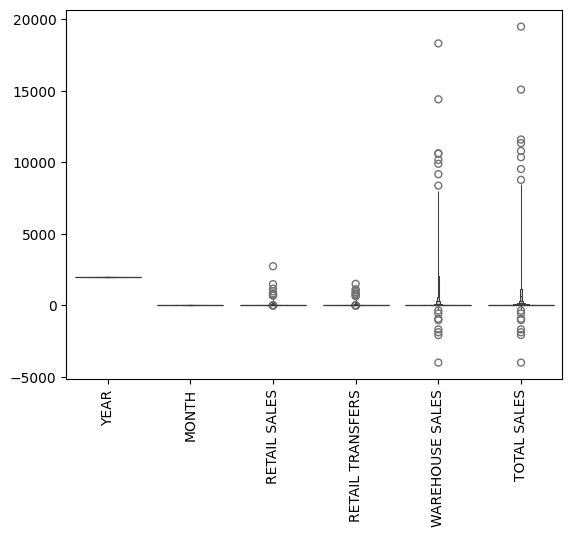

In [72]:
sns.boxenplot(data=r_sales)
plt.xticks(rotation=90)
plt.show()

In [69]:
r_sales_with_zero_sales = r_sales[(r_sales['RETAIL SALES'] == 0)&(r_sales['WAREHOUSE SALES'] == 0)]
r_sales_with_zero_sales

,Date,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL SALES
101,2020-01-01,2020,1,OPICI FAMILY DISTRIBUTING OF MD,10678,BRINLEY GOLD SHIPWRECK COCONUT RUM CREAM- 750ML,LIQUOR,0.0,1.00,0.0,0.0
211,2020-01-01,2020,1,CELICAR LLC DBA TWIN VALLEY DISTILLERS,11402,BLACK JOE COFFEE - 750ML,LIQUOR,0.0,1.00,0.0,0.0
275,2020-01-01,2020,1,DELMAR BREWING COMPANY LLC,11873,EVOLUTION DELMARVA PURE PILS - 12.OZ 4/6NR,BEER,0.0,0.00,0.0,0.0
425,2020-01-01,2020,1,DOPS INC,12991,MICHTERS TOASTED BARREL RYE - 750ML,LIQUOR,0.0,1.00,0.0,0.0
511,2020-01-01,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,142441,TAYLOR 20YR PORT - 750ML,WINE,0.0,0.92,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
29526,2020-03-01,2020,3,PWSWN INC,347769,ISABELLA BOBAL 750 ML,WINE,0.0,0.00,0.0,0.0
29590,2020-03-01,2020,3,LANTERNA DISTRIBUTORS INC,348292,FAR NORTH ALANDER SPICED RUM - 750ML,LIQUOR,0.0,0.33,0.0,0.0
29626,2020-03-01,2020,3,PERNOD RICARD USA LLC,348456,ABSOLUT VAP W/2 GLASSES 750ML - 750ML,LIQUOR,0.0,1.00,0.0,0.0
29746,2020-03-01,2020,3,PWSWN INC,349673,CHOROY CABERNET/MERLOT - 1.5L,WINE,0.0,0.00,0.0,0.0


In [70]:
r_sales_none_zero_sales = r_sales[~((r_sales['RETAIL SALES'] == 0)&(r_sales['WAREHOUSE SALES'] == 0))]
r_sales_none_zero_sales

,Date,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL SALES
0,2020-01-01,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0,2.00
1,2020-01-01,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0,4.00
2,2020-01-01,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0,1.00
3,2020-01-01,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0,1.00
4,2020-01-01,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0,0.82
...,...,...,...,...,...,...,...,...,...,...,...
29994,2020-03-01,2020,3,"THE COUNTRY VINTNER, LLC DBA WINEBOW",352320,CINCO SENTIDOS PAPALOMETL MEZCAL - 750ML,LIQUOR,0.00,0.0,1.0,1.00
29995,2020-03-01,2020,3,"THE COUNTRY VINTNER, LLC DBA WINEBOW",352322,FORTALEZA ANEJO TEQUILA - 750ML,LIQUOR,0.33,0.0,0.0,0.33
29997,2020-03-01,2020,3,OPICI FAMILY DISTRIBUTING OF MD,352354,LOTE 44 MALBEC - 750ML,WINE,0.00,0.0,6.0,6.00
29998,2020-03-01,2020,3,CAMPARI AMERICA LLC,35238,SKYY VODKA - 1.75L,LIQUOR,329.04,302.0,0.0,329.04


In [75]:
r_sales = r_sales.dropna()

In [77]:
#3

In [78]:
r_sales.groupby('MONTH')[['RETAIL SALES','WAREHOUSE SALES']].sum()

,RETAIL SALES,WAREHOUSE SALES
MONTH,,
1,73731.60,285231.72
3,33920.24,113307.22
7,91766.60,418320.42
9,4805.02,7416.57


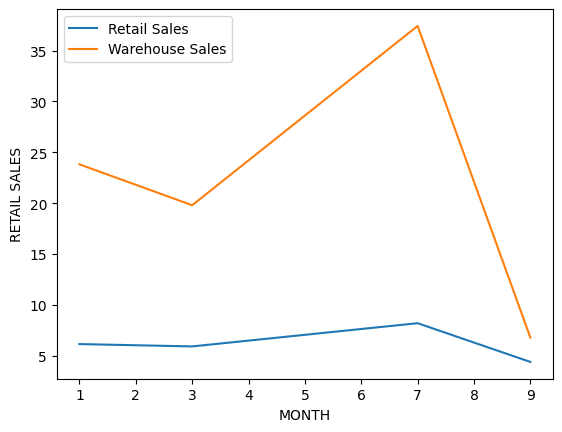

In [87]:
sns.lineplot(data=r_sales,x='MONTH',y='RETAIL SALES',label='Retail Sales',errorbar=None)
sns.lineplot(data=r_sales,x='MONTH',y='WAREHOUSE SALES',label='Warehouse Sales',errorbar=None)
plt.show()

In [94]:
hight_5_sales = r_sales.groupby('ITEM TYPE')['TOTAL SALES'].sum().reset_index(name='total_sales').sort_values('total_sales',ascending=False).head(5)
hight_5_sales

,ITEM TYPE,total_sales
0,BEER,756818.44
7,WINE,179148.77
3,LIQUOR,90539.75
2,KEGS,8400.00
4,NON-ALCOHOL,5421.04


<Axes: xlabel='ITEM TYPE', ylabel='total_sales'>

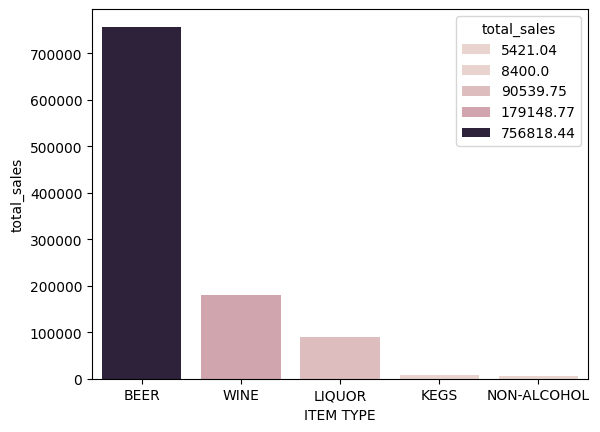

In [97]:
sns.barplot(data=hight_5_sales,x='ITEM TYPE',y='total_sales',hue='total_sales')

In [101]:
r_sales_sup_clean.groupby('SUPPLIER')['TOTAL SALES'].sum().reset_index(name='total_sales').sort_values('total_sales',ascending=False).head(10)

,SUPPLIER,total_sales
52,CROWN IMPORTS,192434.62
8,ANHEUSER BUSCH INC,147630.16
151,MILLER BREWING COMPANY,133017.58
104,HEINEKEN USA,97868.70
26,BOSTON BEER CORPORATION,39069.03
58,DIAGEO NORTH AMERICA INC,34647.90
69,E & J GALLO WINERY,30476.24
48,CONSTELLATION BRANDS,21124.79
82,FLYING DOG BREWERY LLLP,18477.25
142,MARK ANTHONY BRANDS INC,18013.69


In [140]:
#الطريقة الأولى لاستخراج الموردين فق الذين لديهم مبيعاتهم فوق الصفر
supplires_zero_sales_list = r_sales_sup_clean.groupby('SUPPLIER')['TOTAL SALES'].sum().loc[lambda x : x <= 0].index
supplires_none_zero_sales = r_sales_sup_clean[~r_sales_sup_clean['SUPPLIER'].isin(supplires_zero_sales_list)]
supplires_none_zero_sales

,Date,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL SALES,SUPPLIER_TOTAL_SALES
0,2020-01-01,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0,2.00,8206.76
1,2020-01-01,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0,4.00,1947.11
2,2020-01-01,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0,1.00,4199.06
3,2020-01-01,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0,1.00,1195.92
4,2020-01-01,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0,0.82,1365.05
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2020-03-01,2020,3,"THE COUNTRY VINTNER, LLC DBA WINEBOW",352322,FORTALEZA ANEJO TEQUILA - 750ML,LIQUOR,0.33,0.0,0.0,0.33,8763.72
29996,2020-03-01,2020,3,OSLO ENTERPRISE,352324,DOMAINE BRICHOT BLANC - 750ML,WINE,0.00,0.0,0.0,0.00,121.81
29997,2020-03-01,2020,3,OPICI FAMILY DISTRIBUTING OF MD,352354,LOTE 44 MALBEC - 750ML,WINE,0.00,0.0,6.0,6.00,1834.62
29998,2020-03-01,2020,3,CAMPARI AMERICA LLC,35238,SKYY VODKA - 1.75L,LIQUOR,329.04,302.0,0.0,329.04,3753.13


In [141]:
#الطريقة الثانية لاستخراج الموردين فقط الذين لديهم مبيعاتهم فوق الصفر
r_sales_sup_clean = r_sales_sup_clean.copy()
r_sales_sup_clean['SUPPLIER_TOTAL_SALES'] = r_sales_sup_clean.groupby('SUPPLIER')['TOTAL SALES'].transform('sum') #اضافة عمود يحتوي على المجموع العام لمبيعات كل مورد في كل سطر خاص بالمورد
r_sales_sup_clean[r_sales_sup_clean['SUPPLIER_TOTAL_SALES'] > 0]

,Date,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL SALES,SUPPLIER_TOTAL_SALES
0,2020-01-01,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0,2.00,8206.76
1,2020-01-01,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0,4.00,1947.11
2,2020-01-01,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0,1.00,4199.06
3,2020-01-01,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0,1.00,1195.92
4,2020-01-01,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0,0.82,1365.05
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2020-03-01,2020,3,"THE COUNTRY VINTNER, LLC DBA WINEBOW",352322,FORTALEZA ANEJO TEQUILA - 750ML,LIQUOR,0.33,0.0,0.0,0.33,8763.72
29996,2020-03-01,2020,3,OSLO ENTERPRISE,352324,DOMAINE BRICHOT BLANC - 750ML,WINE,0.00,0.0,0.0,0.00,121.81
29997,2020-03-01,2020,3,OPICI FAMILY DISTRIBUTING OF MD,352354,LOTE 44 MALBEC - 750ML,WINE,0.00,0.0,6.0,6.00,1834.62
29998,2020-03-01,2020,3,CAMPARI AMERICA LLC,35238,SKYY VODKA - 1.75L,LIQUOR,329.04,302.0,0.0,329.04,3753.13


In [157]:
items_with_zero_sales = r_sales.groupby(['ITEM DESCRIPTION','ITEM TYPE'])['TOTAL SALES'].sum().loc[lambda x : x ==0]
items_with_zero_sales

ITEM DESCRIPTION                                  ITEM TYPE
7 LOCKS BITCH MONKEY SOUR DRY HOP CITRA 4/6 CANS  BEER         0.0
7 LOCKS GRUBBY THICKET 4/6 CANS                   BEER         0.0
99 SCHNAPPS - BANANA - 1L                         LIQUOR       0.0
A TO Z CHARD - 375ML                              WINE         0.0
A TO Z P/NOIR - 375ML                             WINE         0.0
                                                              ... 
WILLAKENZIE EST ROSE - 750ML                      WINE         0.0
WILLM RIES - 375ML                                WINE         0.0
ZACHLAWI POTATO VODKA - 750ML                     LIQUOR       0.0
ZACO TEMP - 750ML                                 WINE         0.0
ZAIBO BEER 5/4 NR - 500ML                         BEER         0.0
Name: TOTAL SALES, Length: 83, dtype: float64

In [165]:
#get_level_values تُستخدم مع MultiIndex (فهرس متعدد المستويات) لاستخراج قيم مستوى معيّن من الفهرس (وليس من الأعمدة)
item_types = items_with_zero_sales.index.get_level_values('ITEM TYPE')
item_types.value_counts()

ITEM TYPE
WINE            39
LIQUOR          19
KEGS            10
BEER             8
STR_SUPPLIES     7
Name: count, dtype: int64

In [166]:
r_sales.groupby('MONTH')['TOTAL SALES'].sum()

MONTH
1    358963.32
3    147227.46
7    510087.02
9     12221.59
Name: TOTAL SALES, dtype: float64